In [1]:
import pandas as pd 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
import itertools
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc
from scipy import interp
import json
from collections import Counter
import pathlib

In [2]:
experiment = "b10"

f = open(f"experiments/{experiment}.txt")
pathlib.Path(f"visualisations/{experiment}").mkdir(exist_ok=True)

# returns JSON object as
# a dictionary
data = json.load(f) # ids, labels, preds

test_df = pd.DataFrame(data,index=data['ids'])
test_df['ids'] = test_df['ids'].astype(str)
test_df.set_index('ids',drop=True,inplace=True)


# Test Class and Class prediction Distribution

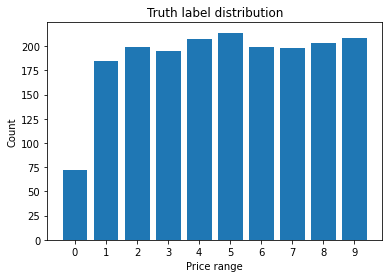

In [3]:
class_dic = dict(test_df.labels.value_counts())
class_dic = dict(sorted(class_dic.items()))
plt.bar([str(x) for x in class_dic.keys()],class_dic.values())
plt.ylabel('Count')
plt.xlabel('Price range')
plot_name = "Truth label distribution"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

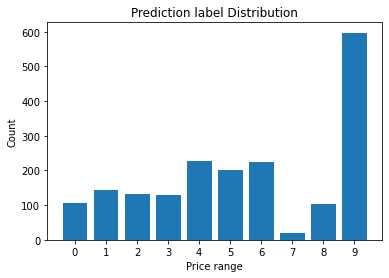

In [4]:
class_dic = dict(test_df.preds.value_counts())
class_dic = dict(sorted(class_dic.items()))

plt.bar([str(x) for x in class_dic.keys()],class_dic.values())
plt.ylabel('Count')
plt.xlabel('Price range')
plot_name = 'Prediction label Distribution'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

# Confusion Matrix

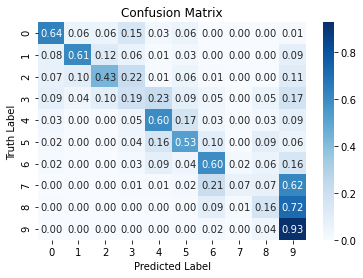

In [5]:
cm = confusion_matrix(test_df.labels.to_numpy(),test_df.preds.to_numpy(),normalize='true')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmap = "Blues" 
if experiment == 'b20':
    fig_dims = (11, 11)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(cmn, annot=True, fmt='.2f',ax=ax,cmap=cmap)
if experiment == 'b100':
    pass
else:
    sns.heatmap(cmn, annot=True, fmt='.2f',cmap=cmap)

plt.ylabel('Truth Label')
plt.xlabel('Predicted Label')
plot_name = 'Confusion Matrix'

plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 


# Classification Report

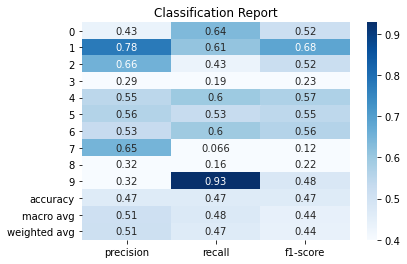

In [6]:
cr = classification_report(test_df.labels.to_numpy(),test_df.preds.to_numpy(), output_dict=True)
cmap = "Blues"
if experiment == 'b20':
    fig_dims = (11, 11)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True , vmin=0.4,cmap=cmap,ax=ax) 
if experiment == 'b100':
    pass
else:
    sns.heatmap(pd.DataFrame(cr).iloc[:-1, :].T, annot=True , vmin=0.4,cmap=cmap) 
plot_name = 'Classification Report'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 

# ROC Curve

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc
from scipy import interp



def plot_roc_curve_multiclass(y_true, y_pred, n_classes,class_names=None):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    print("AUC Score: ")
    print(roc_auc_score(np.array(pd.get_dummies(y_true)), np.array(pd.get_dummies(y_pred)), "macro",multi_class = 'ovr'))
    
    t1=sum(x==0 for x in y_pred-y_true)/len(y_pred)

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true))[:, i], np.array(pd.get_dummies(y_pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr['macro'] = all_fpr
    tpr['macro'] = mean_tpr
    roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    
    colors = itertools.cycle(['aqua', 'darkorange', 'red','lime','gold','blue','purple','crimson','green'])
    for i, color in zip(range(n_classes), colors):
        if class_names:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(class_names[i], roc_auc[i]))
        else:
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plot_name = 'Receiver Operating Characteristic'
    plt.title(f'{plot_name}')
    plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf') 
    plt.show()
    

AUC Score: 
0.7078652660270214


C:\Users\cawin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass average=macro as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-7-845245da4007>:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


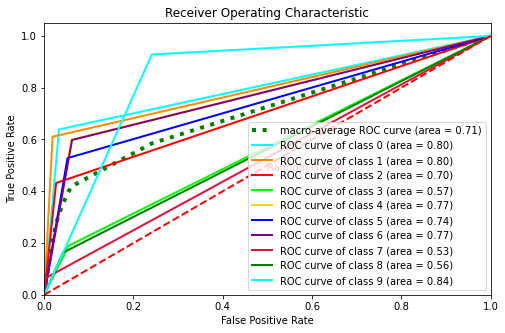

In [8]:
plot_roc_curve_multiclass(test_df.labels.to_numpy(),test_df.preds.to_numpy(),len(test_df.labels.unique()))

In [655]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import json 
# import glob
# import seaborn as sns

# category = {'Async Music':"Music", 'Boonji Project':"Image", 'Bored Ape Yacht Club':"Image",
#             'VeeFriends':"Image", 'CryptoPunks':"Image", 'Doodles':"Image", 'EulerBeats Enigma':"Music",
#             'EulerBeats Genesis':"Music", 'Cryptoblots by Dam Aggott-Hnsch':"Image",
#             'JingleBe NFT COLLECTION':"Music", 'LOSTPOETS':"Image", 'NAMEWEE4896 Collection':"Music",
#             'Nifty Sax Spheres':"Music", 'Rarible':"*Marketplace (Rarible/Superrare)", 'Song A Day':"Video", '"I\'m Spottie"':"Music",
#             'SuperRare':"*Marketplace (Rarible/Superrare)", 'THE SHIBOSHIS':"Image"}


# df = pd.DataFrame()

# for json_files in glob.glob('data\preprocessed\json\*.json'):
#     if not df.empty:
#         temp = pd.read_json(json_files)
#         if len(temp) == 2:
#             temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         else:
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         df = df.append(temp.head(1))
#     else:
#         temp = pd.read_json(json_files)
#         if len(temp) == 2:
#             temp.at[0,'media_filenames'] = [temp.iloc[0].media_filenames,temp.iloc[1].media_filenames]
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         else:
#             temp.at[0,'ids'] = json_files.split("\\")[-1].replace('.json',"")
#         df = pd.DataFrame(temp.head(1))
# df.fillna('',inplace=True)
# df = df.astype({"name": str, "description": str, "collection_name": str, "collection_description":str})
# df['Category'] = df['collection_name'].apply(lambda x: category.get(x))
# df.set_index('ids',drop=True,inplace=True)

In [656]:
combined_df = test_df.merge(df, left_index=True, right_index=True)
combined_df['Price of NFT'] = (combined_df.eth_price*pd.to_numeric(combined_df.usd_price)*10**(-float(combined_df.eth_price_decimal.head(1))))
combined_df.Category.loc[combined_df.Category == '*Marketplace (Rarible/Superrare)'] = "Marketplace"
combined_df

C:\Users\cawin\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,labels,preds,name,description,collection_name,collection_description,eth_price,eth_price_decimal,usd_price,usd_volume,usd_marketcap,transaction_time,media_filenames,has_audio_in_video,Category,Price of NFT
ids,,,,,,,,,,,,,,,,
2344,2,9,CryptoPunk #3013,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",9.900000e+17,18,345.555,1.20306e+10,3.86993e+10,2020-07-31 02:52:59,data/preprocessed/media/tmp/2344.jpg,False,Image,342.099103
9742,7,6,Confident Cobra,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,2.399000e+19,18,1813.22,2.27743e+10,2.11131e+11,2021-06-25 23:14:03,data/preprocessed/media/tmp/9742.jpg,False,Image,43499.081396
3232,9,9,CryptoPunk #4235,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",1.500000e+20,18,2958.99,2.73717e+10,3.47997e+11,2021-09-20 19:27:35,data/preprocessed/media/tmp/3232.jpg,False,Image,443848.500000
10426,6,6,Sensitive Centipede,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,3.650000e+18,18,2590.26,3.06001e+10,3.00985e+11,2021-06-07 06:40:31,data/preprocessed/media/tmp/10426.jpg,False,Image,9454.461060
2846,7,9,CryptoPunk #3690,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",1.650000e+19,18,1988.46,2.02728e+10,2.31509e+11,2021-06-24 15:42:05,data/preprocessed/media/tmp/2846.jpg,False,Image,32809.528554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,6,6,Bad-Ass Bulldog,This token is verifiable for admission to VeeC...,VeeFriends,A Gary Vaynerchuk NFT project around meaningfu...,5.750000e+18,18,2324.68,2.08919e+10,2.71029e+11,2021-07-06 12:39:04,data/preprocessed/media/tmp/10474.jpg,False,Image,13366.906832
2738,2,9,CryptoPunk #3545,,CryptoPunks,"CryptoPunks launched as a fixed set of 10,000 ...",9.500000e+17,18,223.147,1.67412e+10,2.44615e+10,2020-02-08 14:25:47,data/preprocessed/media/tmp/2738.jpg,False,Image,211.989196
7539,2,2,I'm Spottie (8-Bit Edition),"""I'm Spottie"" is the debut album from the best...","""I'm Spottie""",Debut album from the best (only) CryptoPunk ra...,6.800000e+16,18,3020.09,2.15392e+10,3.53837e+11,2021-08-18 23:33:05,"[data/preprocessed/media/7539.mp3, data/prepro...",False,Music,205.366120


C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

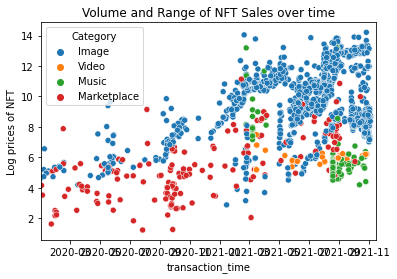

In [657]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.Category).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")

C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

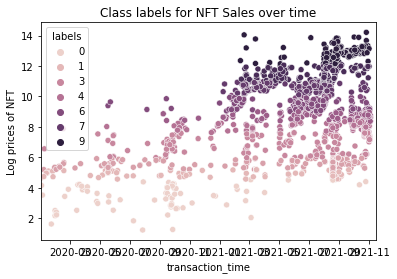

In [658]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.labels).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Class labels for NFT Sales over time")
plt.ylabel("Log prices of NFT")


C:\Users\cawin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Log prices of NFT')

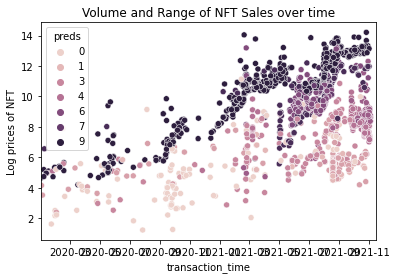

In [659]:
sns.scatterplot(combined_df.transaction_time,np.log(combined_df['Price of NFT']),hue=combined_df.preds).set(xlim=(combined_df.transaction_time.min(),combined_df.transaction_time.max()))
plt.title("Volume and Range of NFT Sales over time")
plt.ylabel("Log prices of NFT")

In [660]:
combined_df.Category.unique()

array(['Image', 'Video', 'Music', 'Marketplace'], dtype=object)

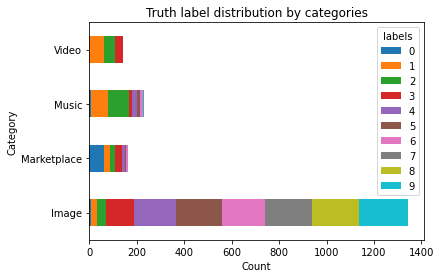

In [661]:
labels = pd.DataFrame(pd.DataFrame(zip(combined_df.Category,combined_df.labels),columns=['Category','labels']).value_counts(),columns=['Count']).unstack()
labels.columns = labels.columns.droplevel(level=0)
labels.plot(kind='barh', stacked=True)
plt.xlabel("Count")
plot_name = 'Truth label distribution by categories'
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

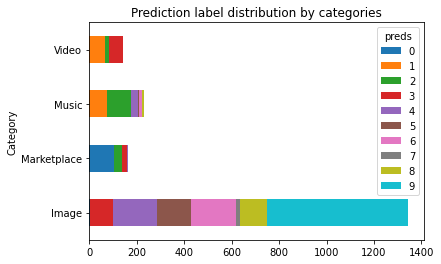

In [662]:
preds = pd.DataFrame(pd.DataFrame(zip(combined_df.Category,combined_df.preds),columns=['Category','preds']).value_counts(),columns=['Count']).unstack()
preds.columns = preds.columns.droplevel(level=0)
preds.plot(kind='barh',stacked=True)
plot_name = "Prediction label distribution by categories"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

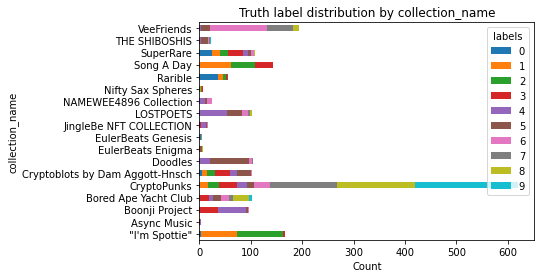

In [663]:
labels = pd.DataFrame(pd.DataFrame(zip(combined_df.collection_name,combined_df.labels),columns=['collection_name','labels']).value_counts(),columns=['Count']).unstack()
labels.columns = labels.columns.droplevel(level=0)
labels.plot(kind='barh',stacked=True)
plt.xlabel("Count")
plot_name = "Truth label distribution by collection_name"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 

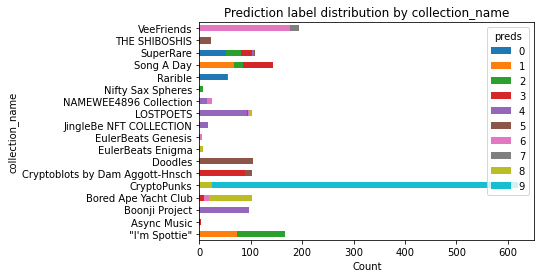

In [664]:
preds = pd.DataFrame(pd.DataFrame(zip(combined_df.collection_name,combined_df.preds),columns=['collection_name','preds']).value_counts(),columns=['Count']).unstack()
preds.columns = preds.columns.droplevel(level=0)
preds.plot(kind='barh',stacked=True)
plt.xlabel("Count")
plot_name = "Prediction label distribution by collection_name"
plt.title(f'{plot_name}')
plt.savefig(f'visualisations/{experiment}/{experiment} {plot_name}.pdf',bbox_inches='tight') 